Here we are going to use webscraping techniques to gather data from the current prem season and plot some graphs.

In [9]:
import pandas as pd

url_df = 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'

df = pd.read_html(url_df)
df = pd.read_html(url_df)[0]
# creating a data with the same headers but without multi indexing
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

df.head()
shots = df[['Squad', 'Standard SoT']]
print(type(shots['Standard SoT'][0]))
shots.head()

<class 'numpy.int64'>


,Squad,Standard SoT
0,Arsenal,153
1,Aston Villa,152
2,Bournemouth,132
3,Brentford,120
4,Brighton,160


In [10]:
url_df = 'https://fbref.com/en/comps/9/keepers/Premier-League-Stats'

df = pd.read_html(url_df)
df = pd.read_html(url_df)[0]
# creating a data with the same headers but without multi indexing
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)
shots_against = df[['Squad', 'Performance SoTA']]
shots['SoTA'] = shots_against['Performance SoTA']
shots['path'] = '/Users/pstanis/Documents/personal_projects/data_analysis/football_analysis/images/club_badges/' + shots['Squad'] + '.png'
shots

,Squad,Standard SoT,SoTA,path
0,Arsenal,153,65,/Users/pstanis/Documents/personal_projects/dat...
1,Aston Villa,152,118,/Users/pstanis/Documents/personal_projects/dat...
2,Bournemouth,132,149,/Users/pstanis/Documents/personal_projects/dat...
3,Brentford,120,150,/Users/pstanis/Documents/personal_projects/dat...
4,Brighton,160,115,/Users/pstanis/Documents/personal_projects/dat...
5,Burnley,95,171,/Users/pstanis/Documents/personal_projects/dat...
6,Chelsea,121,138,/Users/pstanis/Documents/personal_projects/dat...
7,Crystal Palace,109,113,/Users/pstanis/Documents/personal_projects/dat...
8,Everton,121,120,/Users/pstanis/Documents/personal_projects/dat...
9,Fulham,130,145,/Users/pstanis/Documents/personal_projects/dat...


(70.0, 200.0)

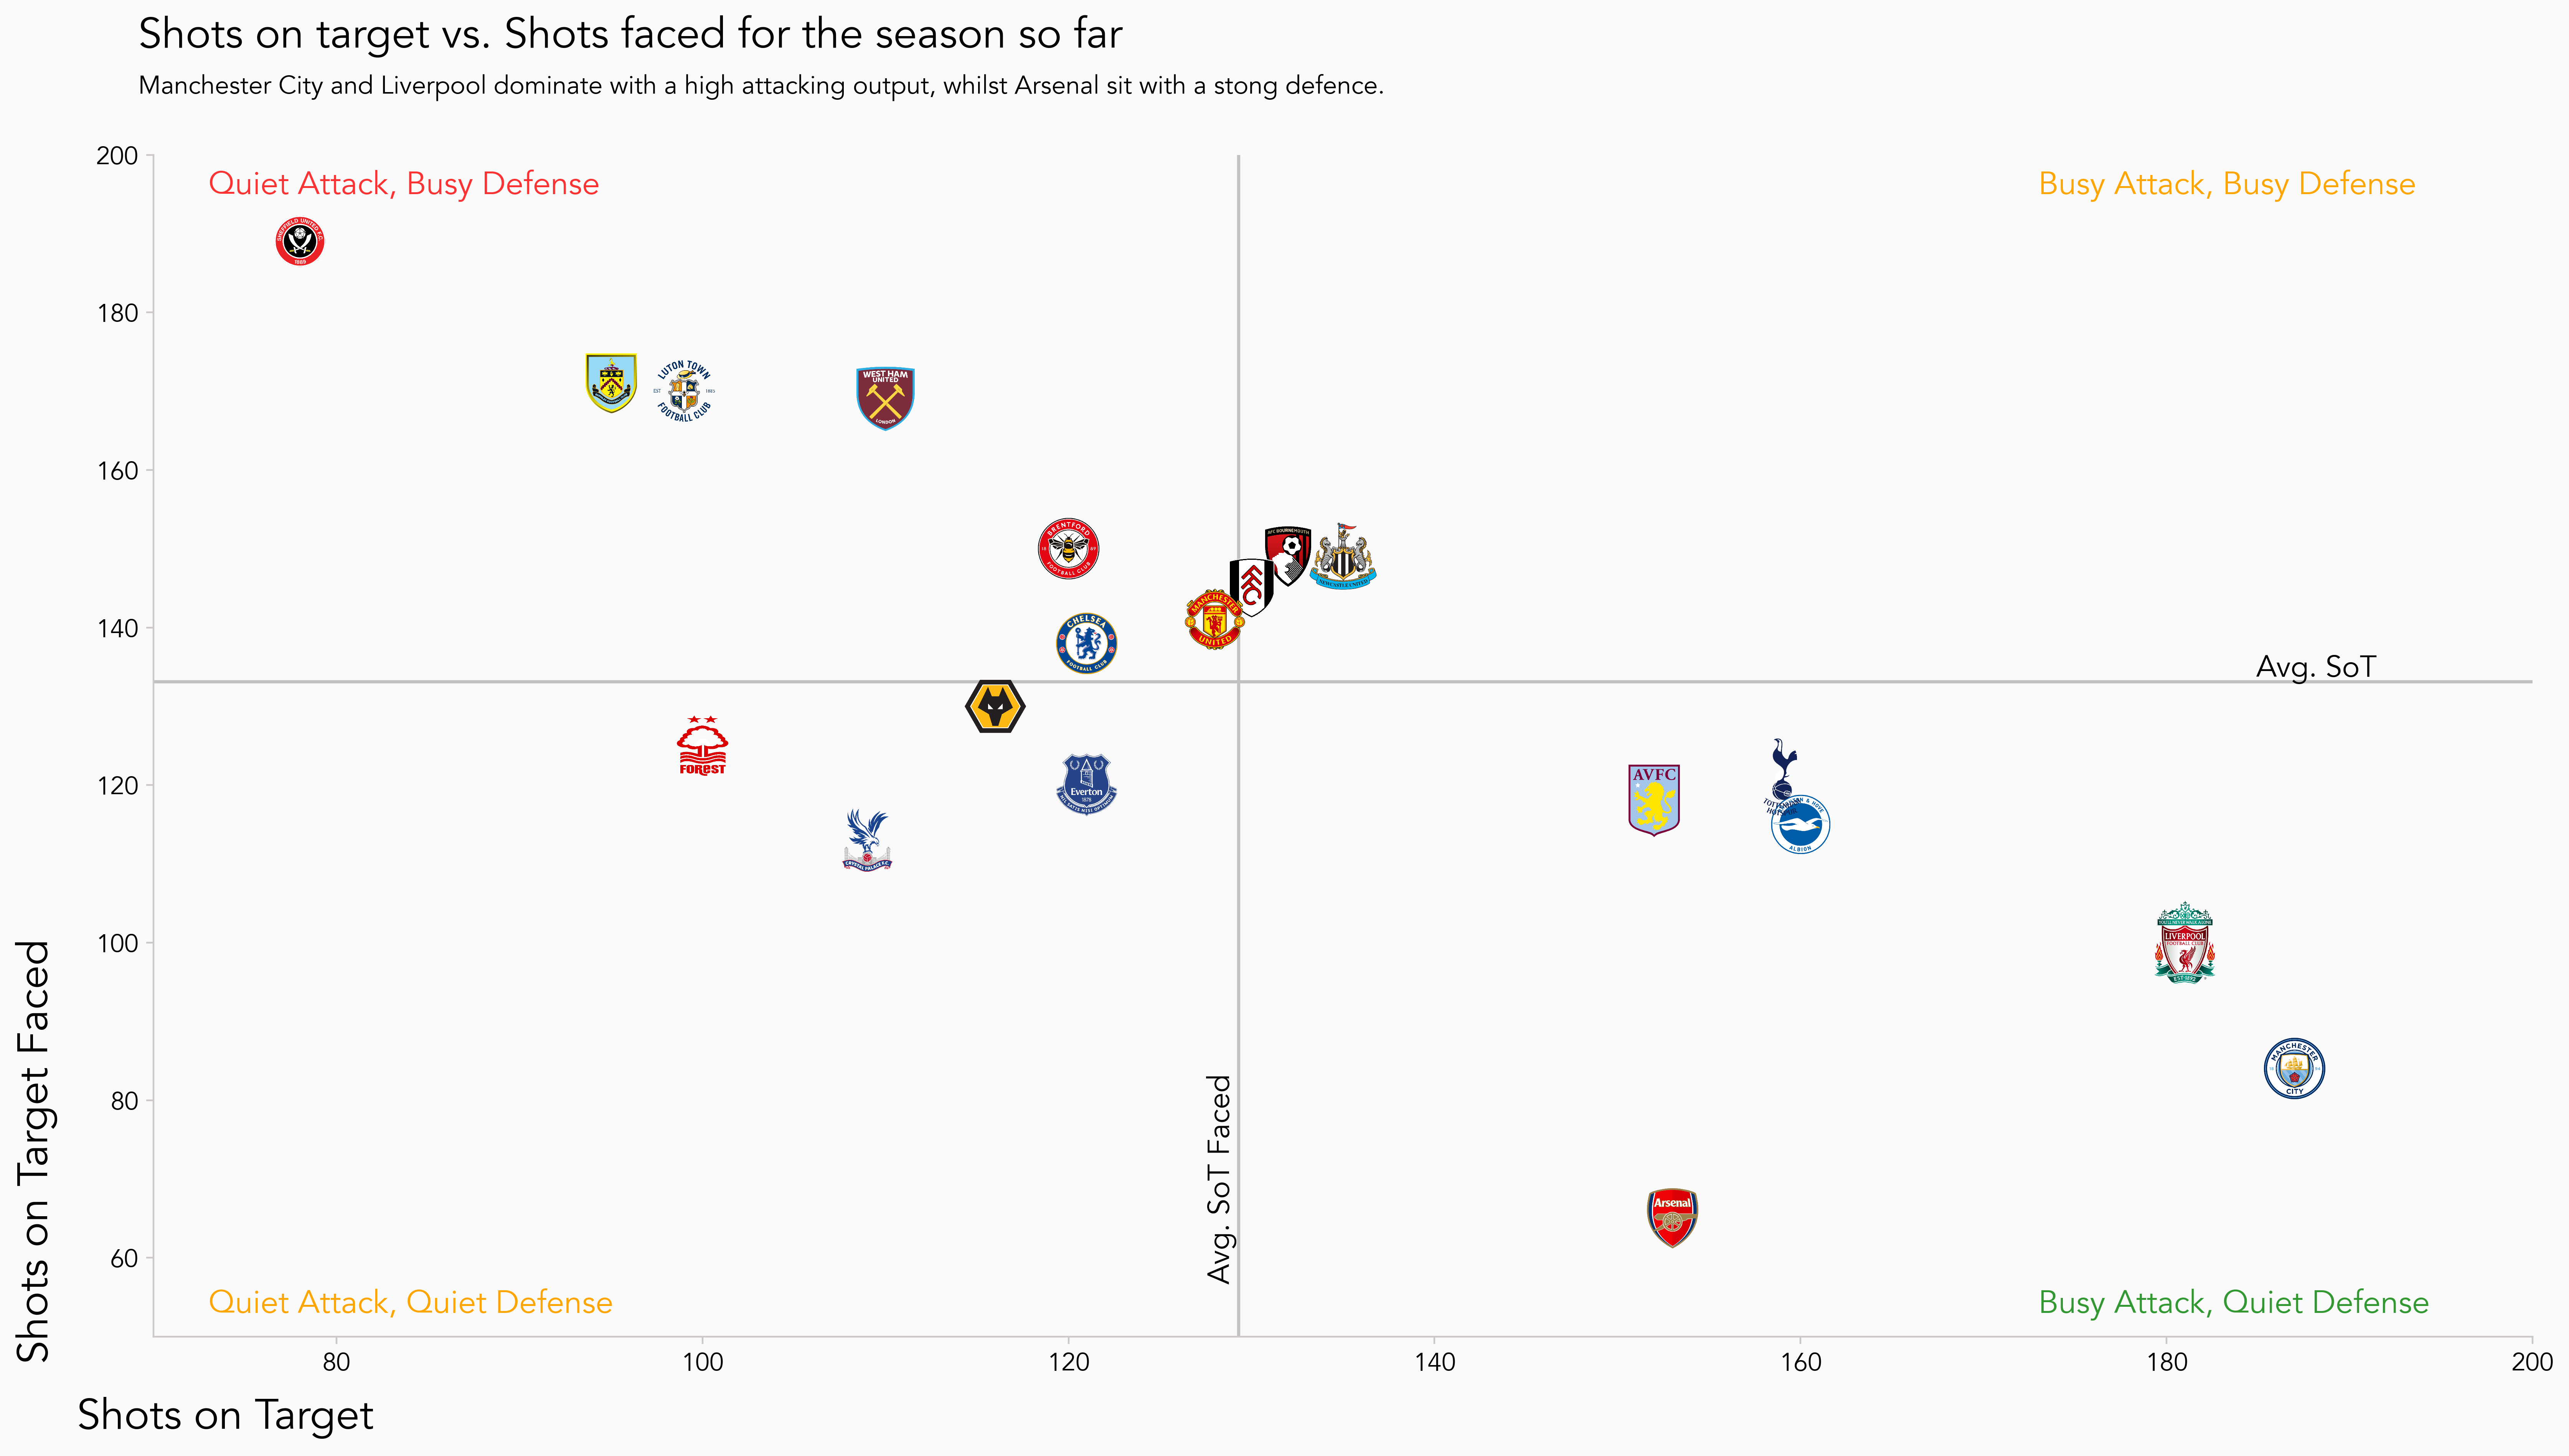

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.08, alpha = 1)

# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

fig, ax = plt.subplots(dpi=400)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
x = shots['Standard SoT']
y = shots['SoTA']
labels = shots['Squad']
ax.scatter(x, y, color='white')

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

for index, row in shots.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Standard SoT'], row['SoTA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(y.mean(), 50, 220, color='#c2c1c0')
plt.vlines(x.mean(), 50, 200, color='#c2c1c0')

# Text

## Title & comment
fig.text(.12,.95,'Shots on target vs. Shots faced for the season so far',size=20)
fig.text(.12,.92,'Manchester City and Liverpool dominate with a high attacking output, whilst Arsenal sit with a stong defence.', size=12)

## Avg line explanation
fig.text(.08,.1,'Shots on Target Faced', size=20, color='black',rotation=90)
fig.text(.1,0.05,'Shots on Target', size=20, color='black')

## Axes titles
fig.text(.81,.54,'Avg. SoT', size=14, color='black')
fig.text(.468,.15,'Avg. SoT Faced', size=14, color='black',rotation=90)

plt.text(73, 195, 'Quiet Attack, Busy Defense', alpha=0.8, color='red', fontsize=15)
plt.text(173, 53, 'Busy Attack, Quiet Defense', alpha=0.8, color='green', fontsize=15)
plt.text(173, 195, 'Busy Attack, Busy Defense', alpha=1, color='orange', fontsize=15)
plt.text(73, 53, 'Quiet Attack, Quiet Defense', alpha=1, color='orange', fontsize=15)

fig.set_size_inches(20,10)
ax.set_ylim(50, 200)
ax.set_xlim(70, 200)